In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [10]:
fname_perf = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_DDF_perfect_validation_lowz_withbias.csv.gz'
data_perf = pd.read_csv(fname_perf)
data_perf['sample'] = 'Perfect'

fname_val = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_DDF_validation_lowz_withbias.csv.gz'
data_val = pd.read_csv(fname_val)
data_val['sample'] = 'Full validation'

data = pd.concat([data_perf, data_val], ignore_index=True)

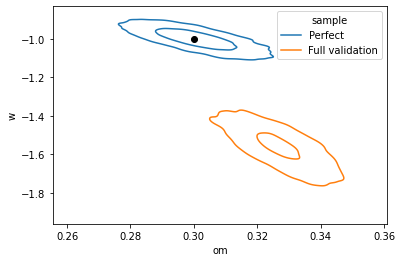

In [13]:
sns.kdeplot(data=data, x="om", y="w", levels=3, hue='sample')
plt.scatter(0.3, -1, marker='o', color='black')
plt.show()